In [ ]:
# Assign the multi-line ASCII art to a variable using triple quotes
# The 'r' before the quotes makes it a "raw string"
ascii_art = r"""
                                                                                                                                                                                    
                                                                                  --------------                                                                                    
                                                                            --------------------------                                                                              
                                                                       ---------                  ---------                                                                         
                                                                    -----:                              :-----                                                                      
                                                                 -----                                      -----                                                                   
                                                              -----                      -                     -----                                                                
                                                            -----                       --                       -----                                                              
                                                          ----               -         ----         -               ----                                                            
                                                         ---                 ---      ------       --                 ----                                                          
                                                       ----                  ----     ------      ---                  ----                                                         
                                                     ----                    ----      ----  --------                    ----                                                       
                                                    -==-                    ------     ----  ---------                    ----                                                      
                                                   -==                        --       -----=--   -=:                      --=-                                                     
                                                  ===-                       ---     -----------  -=-                        ==-                                                    
                                                 -==                         ==-   -=--=------=-  -==                         ==-                                                   
                                                ====                        ===-  -==   =-- -==-   ==-                        ====                                                  
                                                ===                         === -==-== -=== -==-   ===                         -==                                                  
                                               ===                         ======-==== ==== ====   :===                         ===                                                 
                                               ===                         =====  ==== ==== ====   -===                         ===-                                                
                                              ===                          =====  ==== ==== ====  =====                          ===                                                
                                              ===                          ====== =++= ==== ==== ======                          ===                                                
                                             ===                          - ====================+=====----                        ==                                                
                                             ===                               =+++++==+++++++======= -==                         =+=                                               
                                             =+=                                  =+++*+++===========-=-                          =+=                                               
                                             ++=                                ===== *+=======---==                              =+=                                               
                                             ++=                                 -== ==++===---===                                =+=                                               
                                             =++                                  + +++========- ==-                              =+=                                               
                                             +++                                   ++=+++==  === ===                              ++=                                               
                                             +++                                    ++++****=====                                 ++                                                
                                              +++                                   ** *++======                                 +++                                                
                                              +++                                    + ==+++===                                  +++                                                
                                               +++                                   +++++++=                                   +++=                                                
                                               +++                                  =*+**++* =                                  +++                                                 
                                                +++                                 *+*+**** +=                                +++                                                  
                                                ++++                                 *+*++*+-==                               ++++                                                  
                                                 +++                                   **++=+==                               +++                                                   
                                                  ++++                                 *++++=++                             ++++                                                    
                                                   +++                                +***+*+                              *+++                                                     
                                                    +***                      :       ******       -                      ***+                                                      
                                                      ***           ++*++=            ******            =+++++           +**                                                        
                                                       ****   +*****     ++++=  -==-  *+****  --=+  ===+++    +*+**+   +**+                                                         
                                                         ******+       **     ++*     +++***      +*     ++       +******                                                           
                                                          *****   ++   ***+     *+***+**********+*+    ++*+   +-   *****                                                            
                                                            *****  ****    +***************************    ****  *****                                                              
                                                               ****+   +*****+-                    -+*****+   +****                                                                 
                                                                 *********    +********************+    +********                                                                   
                                                                    +****************************************+                                                                      
                                                                       ***********************************+                                                                         
                                                                             ************************                                                                               
                                                                                                                                                                                                                                                                                                                                                                        
                                          ███████████     ███████     █████████  ██████████ █████ ██████████      ███████    ██████   █████
                                         ░░███░░░░░███  ███░░░░░███  ███░░░░░███░░███░░░░░█░░███ ░░███░░░░███   ███░░░░░███ ░░██████ ░░███ 
                                          ░███    ░███ ███     ░░███░███    ░░░  ░███  █ ░  ░███  ░███   ░░███ ███     ░░███ ░███░███ ░███ 
                                          ░██████████ ░███      ░███░░█████████  ░██████    ░███  ░███    ░███░███      ░███ ░███░░███░███ 
                                          ░███░░░░░░  ░███      ░███ ░░░░░░░░███ ░███░░█    ░███  ░███    ░███░███      ░███ ░███ ░░██████ 
                                          ░███        ░░███     ███  ███    ░███ ░███ ░   █ ░███  ░███    ███ ░░███     ███  ░███  ░░█████ 
                                          █████        ░░░███████░  ░░█████████  ██████████ █████ ██████████   ░░░███████░   █████  ░░█████
                                          ░░░░░           ░░░░░░░     ░░░░░░░░░  ░░░░░░░░░░ ░░░░░ ░░░░░░░░░░      ░░░░░░░    ░░░░░    ░░░░░ 
                                                                            
                                                                                                                                                                                                                                                                                                      
"""

# Print the variable to the terminal
print(ascii_art)

In [ ]:
# Assign the multi-line ASCII art to a variable using triple quotes
# The 'r' before the quotes makes it a "raw string"
ascii_art = r"""                                                                                                       
                                                                                                                                                                                            
                                                                                                              
                                                                                                              
                                               ███████████████                                                
                                           ████████       █████████                                           
                                       ██████                    █████                                        
                                     ████             █             ████                                      
                                   ████        █     ███     █         ███                                    
                                  ███          ███  █████   ██           ███                                  
                                ███            ███   ███   ███            ███                                 
                               ███             ██    ███    ██             ███                                
                              ███              ██    ███    ██              ███                               
                             ███              ███    ███    ███              ███                              
                             ██               ███    ███     ███              ██                              
                            ███              ████    ███    ████               ██                             
                            ██                █████  ███  █████                ██                             
                           ███                 ███████████████                  ██                            
                           ███                     ███████                      ██                            
                           ███                       ████                       ██                            
                           ███                       ███████                    ██                            
                            ██                       ███████                   ██                             
                            ██                       ██████                    ██                             
                             ██                    ███████                    ███                             
                             ███                    ███████                  ███                              
                              ███                    ██████                 ███                               
                               ███                   █████                 ███                                
                                ███       ███████   █████    ██████       ███                                 
                                 ████ █████ █████████████ ███ ██████████ ███                                  
                                   ████ ██  ██  █████████████  ███ ██ ████                                    
                                     ████ ████  █████████████   ████████                                      
                                        ██████████████████████████████                                        
                                           ████████████████████████                                           
                                               ███████████████                                                
                                                                                                                                                                                                                                                                      
                                                                                                              
                        ██████╗  ██████╗ ███████╗███████╗██╗██████╗  ██████╗ ███╗   ██╗
                        ██╔══██╗██╔═══██╗██╔════╝██╔════╝██║██╔══██╗██╔═══██╗████╗  ██║
                        ██████╔╝██║   ██║███████╗█████╗  ██║██║  ██║██║   ██║██╔██╗ ██║
                        ██╔═══╝ ██║   ██║╚════██║██╔══╝  ██║██║  ██║██║   ██║██║╚██╗██║
                        ██║     ╚██████╔╝███████║███████╗██║██████╔╝╚██████╔╝██║ ╚████║
                        ╚═╝      ╚═════╝ ╚══════╝╚══════╝╚═╝╚═════╝  ╚═════╝ ╚═╝  ╚═══╝
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
"""

# Print the variable to the terminal
print(ascii_art)

In [1]:
import poseidon_core

In [15]:
file_path = '/home/rmccune/Documents/poseidon/data/lidar/combined_point_cloud_down_east.laz'

min_x_extent = 847809.694
max_x_extent = 847973.874
min_y_extent = 127254.634
max_y_extent = 127450.141

grid_gen = poseidon_core.GridGenerator(file_path, min_x_extent, max_x_extent, min_y_extent, max_y_extent)

resolution = 0.05 # meters

pts_array = grid_gen.create_point_array(orig_units='meters')
grid_x, grid_y, grid_z_orig = grid_gen.gen_grid(resolution, z=pts_array)
# grid_z = grid_gen.gen_grid_pdal(resolution, orig_units='meters', interpolation_method='idw', radius=1.5)
# grid_z_tin = grid_gen.gen_grid_pdal_tin(resolution, orig_units='meters')

Directory to store grids created: data/generated_grids


In [28]:
grid_z.shape

(3911, 3284)

In [5]:
grid_z_tin.shape

(3911, 3284)

In [4]:
import numpy as np

In [6]:
print(np.nanmax(grid_z))
print(np.nanmin(grid_z))

2.089666666669162
-0.06643715848180667


In [10]:
print(np.nanmax(grid_z))
print(np.nanmin(grid_z))

2.0395373558946512
-0.05000000000000001


In [8]:
flipped_grid = grid_z.T

In [11]:
elev_grid = np.flipud(grid_z)
# elev_grid_tin = np.flipud(grid_z_tin)

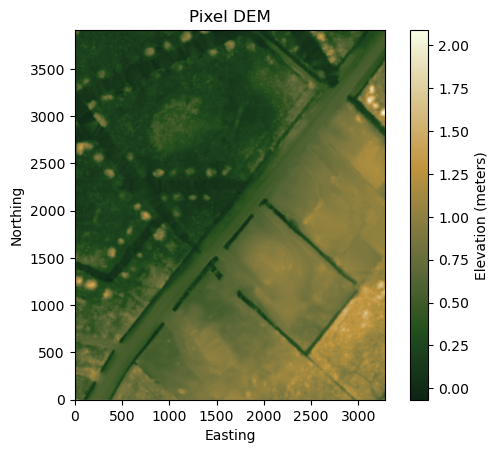

In [17]:
poseidon_core.plotting_utils.plot_elev_grid(grid_z_orig)

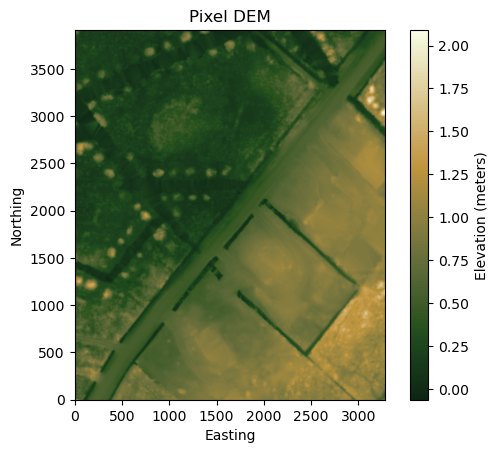

In [25]:
poseidon_core.plotting_utils.plot_elev_grid(elev_grid_tin)

In [16]:
nan_count = np.isnan(grid_z_orig).sum()
print(f"Number of NaNs: {nan_count}")

Number of NaNs: 8834


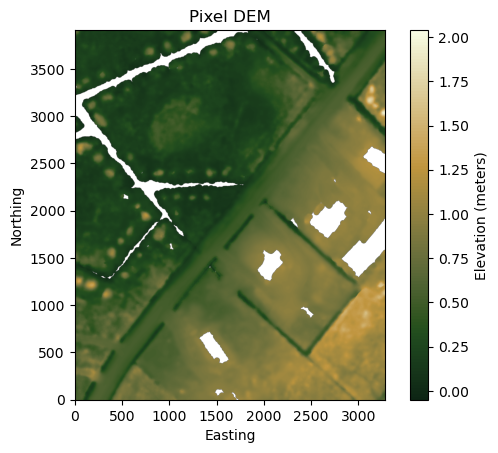

In [13]:
poseidon_core.plotting_utils.plot_elev_grid(elev_grid)

In [18]:
import cmocean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# (Your existing plot_elev_grid function would be here)
# ...

def compare_grids(grid_a, grid_b, name_a="Grid A (TIN)", name_b="Grid B (IDW)"):
    """
    Provides a statistical and visual comparison between two elevation grids.
    
    Assumes grids are "raster-oriented" (top-down) and handles
    NaN values for all calculations and plots.
    
    Parameters:
    ----------
    grid_a : 2D np.ndarray
        The first grid to compare (e.g., from gen_grid_pdal_tin).
    grid_b : 2D np.ndarray
        The second grid to compare (e.g., from gen_grid_pdal 'idw').
    name_a : str
        Display name for the first grid.
    name_b : str
        Display name for the second grid.
    """
    
    # 1. Calculate Difference
    # We use np.nansum to handle cases where one grid has data and the other has NaN.
    # This isn't perfect, but for subtraction, it's safer than (grid_a - grid_b)
    # which would result in NaN if *either* is NaN.
    # A more robust way is to set NaNs to 0 for subtraction, then set back.
    # Let's do (grid_a - grid_b) and let np.nan... functions handle it.
    difference = grid_a - grid_b

    # 2. Print Statistical Summary
    print("--- Grid Comparison Statistics ---")
    print(f"Stats for: {name_a}")
    print(f"  Min: {np.nanmin(grid_a):.3f} m")
    print(f"  Max: {np.nanmax(grid_a):.3f} m")
    print(f"  Mean: {np.nanmean(grid_a):.3f} m")
    print(f"  Std Dev: {np.nanstd(grid_a):.3f} m")
    print("-" * 20)
    
    print(f"Stats for: {name_b}")
    print(f"  Min: {np.nanmin(grid_b):.3f} m")
    print(f"  Max: {np.nanmax(grid_b):.3f} m")
    print(f"  Mean: {np.nanmean(grid_b):.3f} m")
    print(f"  Std Dev: {np.nanstd(grid_b):.3f} m")
    print("-" * 20)
    
    print("Stats for: Difference (A - B)")
    print(f"  Min Diff: {np.nanmin(difference):.3f} m")
    print(f"  Max Diff: {np.nanmax(difference):.3f} m")
    print(f"  Mean Diff: {np.nanmean(difference):.3f} m")
    print(f"  Std Dev (Abs): {np.nanstd(np.abs(difference)):.3f} m")
    print("------------------------------------")

    
    # 3. Plot the Difference Grid
    
    # Flip it for correct plotting with origin='lower'
    plot_diff_grid = np.flipud(difference)
    
    # Get the diverging colormap 'balance' or 'diff' from cmocean
    cmap = cmocean.cm.balance 
    
    # Find the maximum absolute difference to center the colormap at 0
    max_abs_diff = np.nanmax(np.abs(plot_diff_grid))
    
    plt.figure(figsize=(10, 8))
    plt.imshow(
        plot_diff_grid, 
        origin="lower", 
        cmap=cmap,
        vmin=-max_abs_diff,  # Center colormap at 0
        vmax=max_abs_diff
    )
    plt.colorbar(label=f"Elevation Difference (m)\n({name_a} - {name_b})")
    plt.title("Difference Grid")
    plt.xlabel("Easting")
    plt.ylabel("Northing")
    plt.show()

    
    # 4. Plot Histograms 📊
    plt.figure(figsize=(12, 6))
    
    # Filter NaNs for histogram plotting
    hist_a = grid_a[~np.isnan(grid_a)]
    hist_b = grid_b[~np.isnan(grid_b)]
    
    plt.hist(hist_a, bins=100, alpha=0.7, label=name_a, density=True)
    plt.hist(hist_b, bins=100, alpha=0.7, label=name_b, density=True)
    plt.title("Elevation Distribution")
    plt.xlabel("Elevation (m)")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

In [19]:
grid_z_orig = np.flipud(grid_z_orig)

--- Grid Comparison Statistics ---
Stats for: PDAL-TIN
  Min: -0.066 m
  Max: 2.090 m
  Mean: 0.561 m
  Std Dev: 0.344 m
--------------------
Stats for: PDAL-IDW
  Min: -0.050 m
  Max: 2.040 m
  Mean: 0.564 m
  Std Dev: 0.330 m
--------------------
Stats for: Difference (A - B)
  Min Diff: -1.147 m
  Max Diff: 0.592 m
  Mean Diff: -0.001 m
  Std Dev (Abs): 0.030 m
------------------------------------


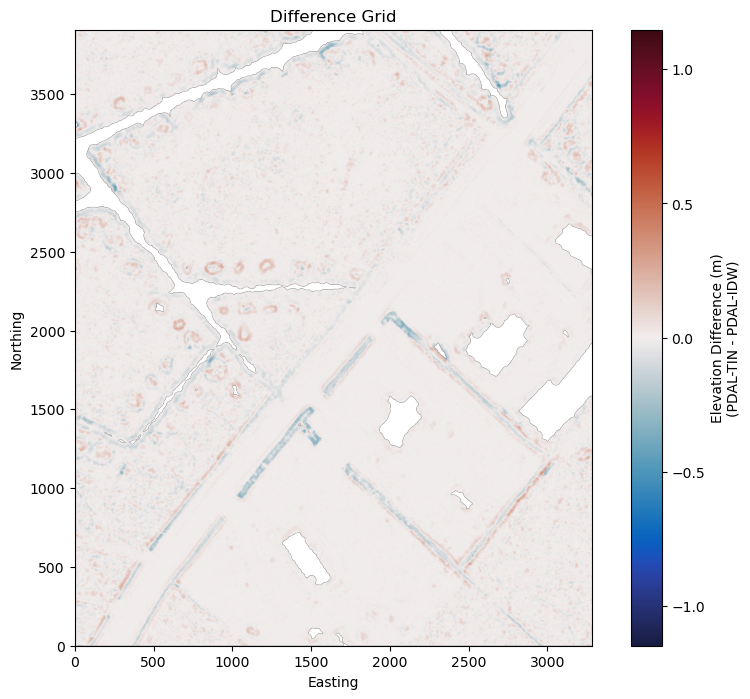

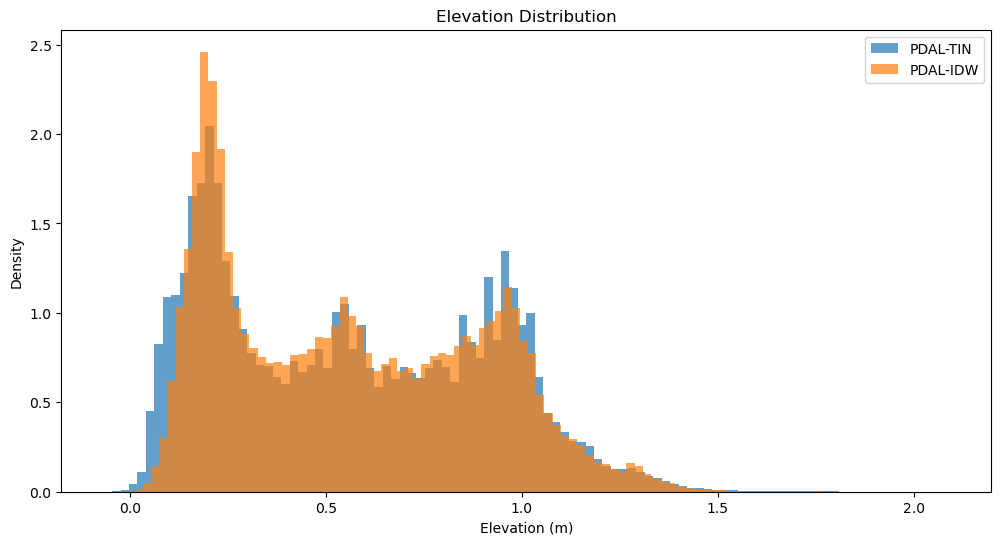

In [20]:
compare_grids(grid_z_orig, grid_z, name_a="PDAL-TIN", name_b="PDAL-IDW")